In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from time import time

In [2]:
def rsvd(A, k, p = 3):
    m, n = A.shape

    # Random matrix from a standard Gaussian distribution
    Omega = np.random.randn(n, min(k + p, m))

    # Obtain the n x (k + p) matrix Y = (A)(Omega)
    Y = A @ Omega

    # Get the orthonormal basis Q of Y
    Q, _ = np.linalg.qr(Y, mode='reduced')

    # Get the projection B of A onto span(Q)
    B = Q.T @ A

    # Compute the SVD of B
    U_B, S, Vt = np.linalg.svd(B, full_matrices=False)

    # Project U_B back to the original space
    U = Q @ U_B

    # Return the k first vectors of the SVD
    return U[:, :k], S[:k], Vt[:k, :]


def rank_k_rsvd_approximation(A, k):
    U_k, S_k, Vt_k = rsvd(A, k)
    Sigma_k = np.diag(S_k)
    return U_k @ Sigma_k @ Vt_k   # U_k @ (S_k * Vt_k)


def rank_k_svd_approximation(A, k):
    U, S, Vt = np.linalg.svd(A, full_matrices=False)
    return U[:, :k] @ np.diag(S[:k]) @ Vt[:k, :]


def mse(original, approximation):
    return np.mean((original - approximation) ** 2)


def plot_greyscale_matrix(A):
    plt.figure(figsize=(5, 5))
    plt.imshow(A, cmap="gray")
    plt.axis('off')
    plt.show()


def plot_greyscale_comparison(A, B, C, k, t1=None, t2=None):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))

    ax1.imshow(A, cmap="gray")
    ax2.imshow(B, cmap="gray")
    ax3.imshow(C, cmap="gray")

    ax1.set_title(f"Original image\nSize = {A.shape}")
    ax2.set_title(f"Rank {k} RSVD approximation\n t = {t1:.2f}s")
    ax3.set_title(f"Rank {k} SVD approximation\n t = {t2:.2f}s")

    ax1.axis("off")
    ax2.axis("off")
    ax3.axis("off")

    plt.tight_layout()
    plt.show()


In [3]:
# Read in image and convert to greyscale matrix
img = Image.open("tree.jpg")
img_grey = img.convert("L")
A = np.array(img_grey)
A.shape

(600, 600)

In [4]:
def comparison_pipeline(A, k):
    # Find k-rank approximation using RSVD
    t0 = time()
    A_k = rank_k_rsvd_approximation(A, k)
    dt1 = time() - t0

    # Find k-rank approximation using SVD
    t0 = time()
    A_k_svd = rank_k_svd_approximation(A, k)
    dt2 = time() - t0

    # Compare the images
    plot_greyscale_comparison(A, A_k, A_k_svd, k, dt1, dt2)

In [5]:
def mse_and_time_algorithm(A, k, algorithm):
    # Time the algorithm 
    t0 = time()
    A_k = algorithm(A, k)
    dt = time() - t0

    # Compute the MSE
    mse_k = mse(A, A_k)
    return mse_k, dt


k_range = range(10, 250)

SVD_MSE = []
RSVD_MSE = []
SVD_time = []
RSVD_time = []

# rank k SVD
for k in k_range:
    mse_k, dt_k = mse_and_time_algorithm(A, k, rank_k_svd_approximation)
    SVD_MSE.append(mse_k)
    SVD_time.append(dt_k)

# rank k RSVD
for k in k_range:
    mse_k, dt_k = mse_and_time_algorithm(A, k, rank_k_rsvd_approximation)
    RSVD_MSE.append(mse_k)
    RSVD_time.append(dt_k)



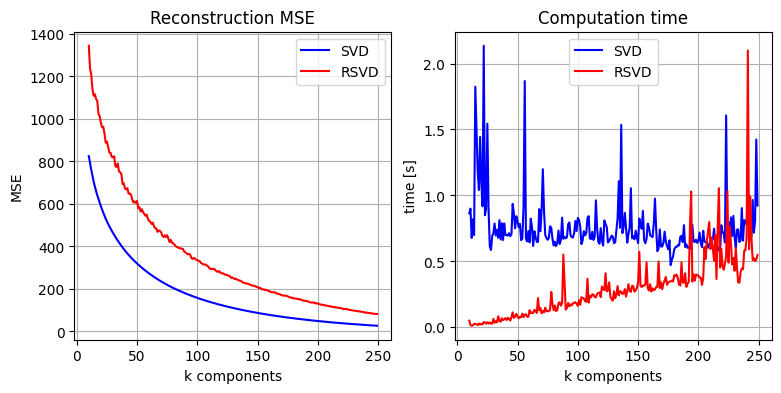

In [9]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(9, 4))
ax.plot(k_range, SVD_MSE, label="SVD", c='b')
ax.plot(k_range, RSVD_MSE, label="RSVD", c='r')
ax.set_title("Reconstruction MSE")
ax.set_ylabel("MSE")
ax.set_xlabel("k components")

ax2.plot(k_range, SVD_time, label="SVD", c='b')
ax2.plot(k_range, RSVD_time, label="RSVD", c='r')
ax2.set_title("Computation time")
ax2.set_ylabel("time [s]")
ax2.set_xlabel("k components")

ax.grid(True)
ax2.grid(True)
ax.legend()
ax2.legend()
plt.show()

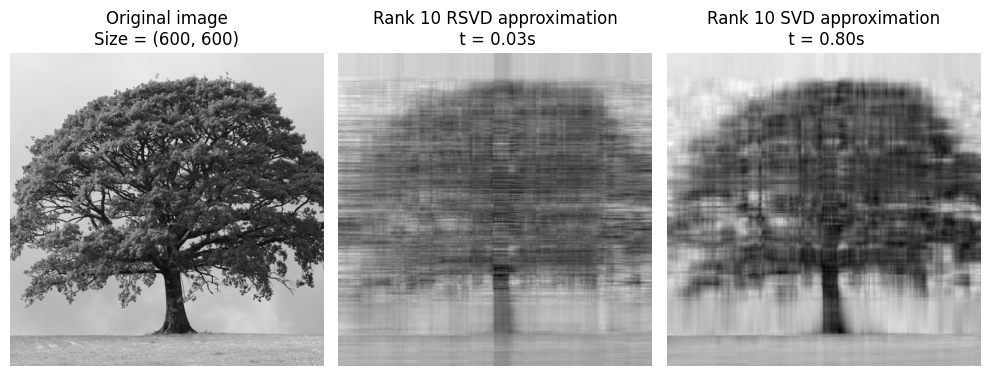

In [10]:
comparison_pipeline(A, 10)

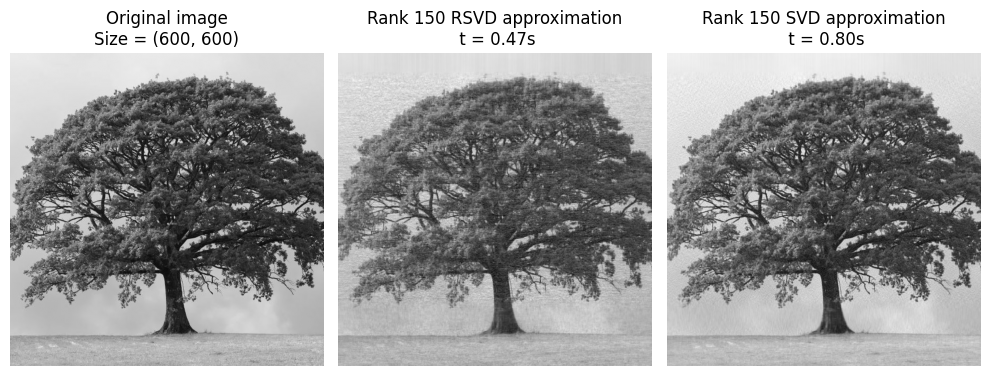

In [11]:
comparison_pipeline(A, 150)